In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pm.csv.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df1 = df[['Age' , 'MonthlyIncome']].head(100)  

In [5]:
df1

,Age,MonthlyIncome
0,41,5993
1,49,5130
2,37,2090
3,33,2909
4,27,3468
...,...,...
95,54,13549
96,24,4999
97,28,4221
98,58,13872


Text(0.5, 1.0, 'Age Vs Salary')

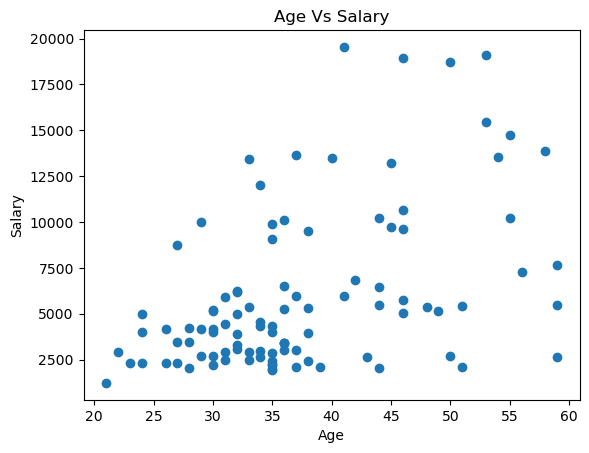

In [6]:
plt.scatter(df1['Age'], df1['MonthlyIncome'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age Vs Salary')

In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans()
km

KMeans()

In [9]:
group = km.fit_predict(df1[['Age','MonthlyIncome']])

C:\Jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
group

array([0, 0, 2, 2, 6, 2, 2, 2, 3, 0, 2, 6, 2, 2, 2, 3, 6, 2, 1, 6, 6, 6,
       5, 2, 2, 4, 6, 7, 3, 4, 2, 7, 2, 2, 2, 2, 2, 2, 6, 0, 2, 2, 2, 3,
       6, 4, 6, 2, 0, 2, 0, 6, 0, 3, 6, 5, 3, 6, 0, 0, 7, 2, 4, 7, 3, 1,
       7, 3, 2, 6, 0, 2, 2, 7, 2, 6, 6, 5, 5, 0, 0, 2, 3, 0, 6, 7, 2, 2,
       6, 3, 5, 0, 0, 3, 0, 5, 0, 6, 5, 2])

In [11]:
np.unique(group)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [12]:
df1['Group'] = group

In [13]:
df1

,Age,MonthlyIncome,Group
0,41,5993,0
1,49,5130,0
2,37,2090,2
3,33,2909,2
4,27,3468,6
...,...,...,...
95,54,13549,5
96,24,4999,0
97,28,4221,6
98,58,13872,5


In [14]:
df1_0 = df1[df1['Group'] == 0]
df1_1 = df1[df1['Group'] == 1]
df1_2 = df1[df1['Group'] == 2]
df1_3 = df1[df1['Group'] == 3]
df1_4 = df1[df1['Group'] == 4]
df1_5 = df1[df1['Group'] == 5]
df1_6 = df1[df1['Group'] == 6]
df1_7 = df1[df1['Group'] == 7]

Text(0.5, 1.0, 'Group wise Age Vs Salary with respective centroids')

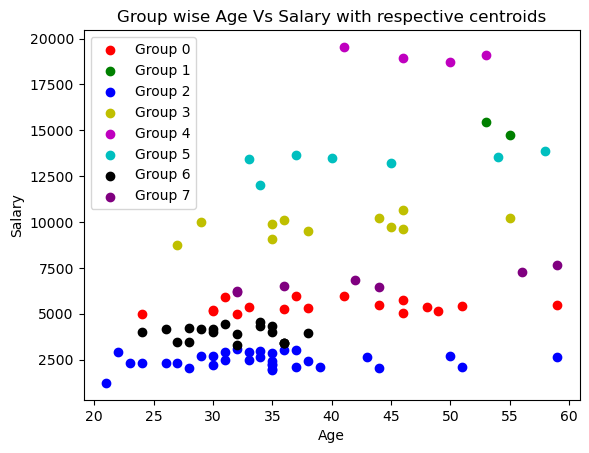

In [15]:
plt.scatter(df1_0['Age'] , df1_0['MonthlyIncome'] , color = 'r' , label = 'Group 0')
plt.scatter(df1_1['Age'] , df1_1['MonthlyIncome'] , color = 'g' ,  label = 'Group 1')
plt.scatter(df1_2['Age'] , df1_2['MonthlyIncome'] , color = 'b' ,  label = 'Group 2')
plt.scatter(df1_3['Age'] , df1_3['MonthlyIncome'] , color = 'y' ,  label = 'Group 3')
plt.scatter(df1_4['Age'] , df1_4['MonthlyIncome'] , color = 'm' ,  label = 'Group 4')
plt.scatter(df1_5['Age'] , df1_5['MonthlyIncome'] , color = 'c' ,  label = 'Group 5')
plt.scatter(df1_6['Age'] , df1_6['MonthlyIncome'] , color = 'k' ,  label = 'Group 6')
plt.scatter(df1_7['Age'] , df1_7['MonthlyIncome'] , color = 'purple' ,  label = 'Group 7')


plt.legend()
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Group wise Age Vs Salary with respective centroids')

In [16]:
cem = km.cluster_centers_

In [17]:
cem

array([[   39.70588235,  5403.47058824],
       [   54.        , 15091.5       ],
       [   34.3030303 ,  2455.21212121],
       [   39.63636364,  9798.54545455],
       [   47.5       , 19081.5       ],
       [   43.        , 13326.42857143],
       [   31.63157895,  3930.10526316],
       [   43.        ,  6724.        ]])

# Sum Square Error

In [19]:
SSE  = []

In [20]:
for i in range(1 , 11):
    km = KMeans(n_clusters= i)
    km.fit_predict(df1[['Age']], df1[['MonthlyIncome']])
    SSE.append(km.inertia_)

C:\Jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [21]:
SSE

[8422.64,
 2293.671685284118,
 1314.726321974148,
 635.5176328502416,
 492.66236772486775,
 342.906346749226,
 230.03186528694965,
 186.2561161387632,
 136.51540404040406,
 94.39716783216782]

Text(0.5, 1.0, 'knee plot')

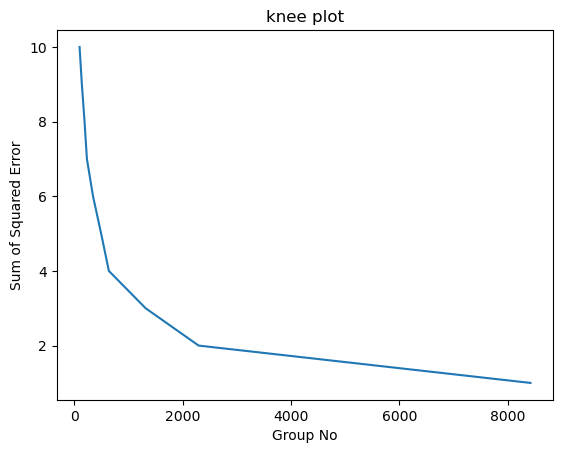

In [22]:
plt.plot(SSE , range(1 , 11))
plt.xlabel("Group No")
plt.ylabel("Sum of Squared Error")
plt.title("knee plot")